# tmp fit — sep24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.chosen import *
from figures.analysis import *
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: yoru

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('EMNIST', model_type, 'mlp|mlp')

cfg_vae['seq_len'] = 1
cfg_tr['kl_beta'] = 1.0

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

tr.n_iters

124800

In [5]:
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")

poisson_EMNIST_t-1_z-[128]_<mlp|mlp>
b200-ep200-lr(0.002)_beta(1:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_29,05:37)

In [6]:
tr.train()

epoch # 200, avg loss: 40.719983: 100%|███████| 200/200 [11:59<00:00,  3.60s/it]


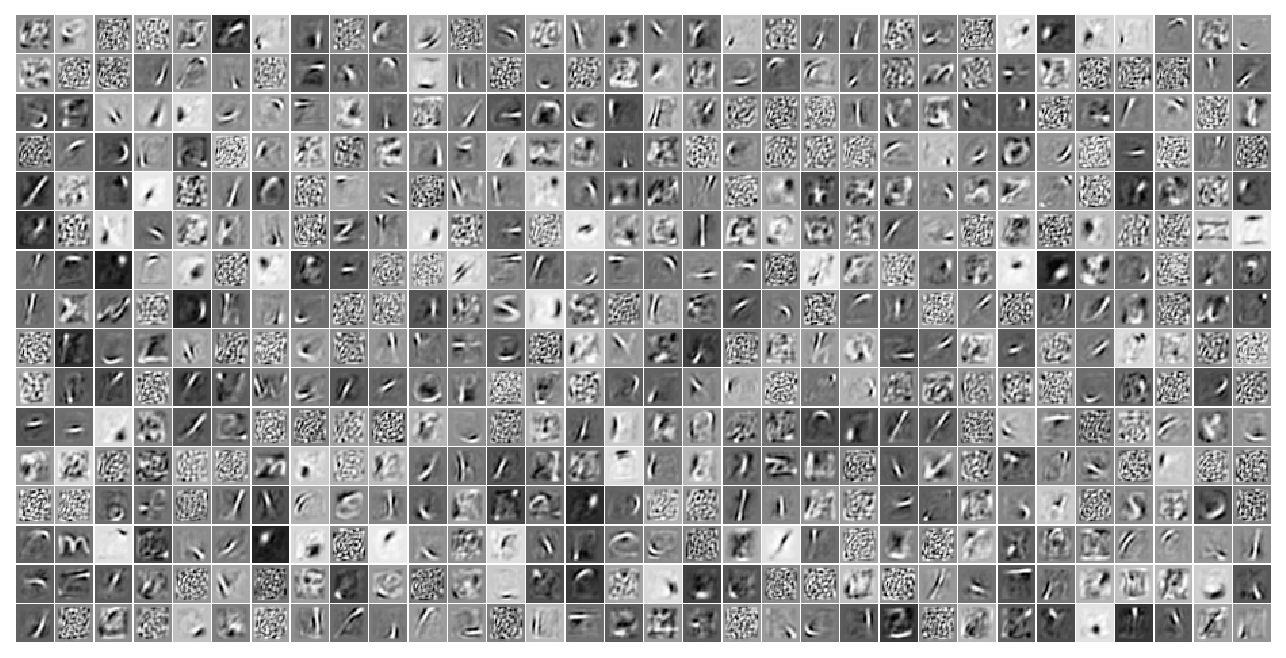

In [7]:
tr.model.show();

In [8]:
total_num_params = sum([
    p.nelement() for p
    in tr.parameters()
])
print(f"{total_num_params / 1e6:0.2f}")

1.13